### Capstone 2.Forecasting Store Data

 #### <span>Import Libraries</span>

In [1]:
import numpy as np 
import pandas as pd
import datetime as dt
import seaborn as sns #시각화
import matplotlib.pyplot as plt
import plotly.express as px #시각화

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error

### <span style="color:#BF1E96">1. .csv 파일 읽어오기 (Train, Store, Test)</span>

In [2]:
df_train = pd.read_csv(r'train.csv')
df_store = pd.read_csv(r'store.csv')

df_test = pd.read_csv(r'test.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_13400\68661713.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(r'train.csv')


### <span style="color:#BF1E96">2. 각 Data Frame 의 크기, head, 결측값, info 확인하기</span>

#### 크기 확인

In [3]:
print('train data 크기 확인 :',df_train.shape)
print('store data 크기 확인 :',df_store.shape)
print('test data 크기 확인 :',df_test.shape)

train data 크기 확인 : (1017209, 9)
store data 크기 확인 : (1115, 10)
test data 크기 확인 : (41088, 8)


#### 첫 5행 확인

In [4]:
print('train data 첫 5행')
df_train.head()

train data 첫 5행


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
print('store data 첫 5행')
df_store.head()

store data 첫 5행


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
print('test data 첫 5행')
df_test.head()

test data 첫 5행


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


#### 결측값 확인

In [7]:
df_train.info()
df_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [8]:
df_test.info()
df_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [9]:
df_store.info()
df_store.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### <span style="color:#BF1E96">3. 결측값을 0으로 채워 넣기</span>

결측값이 있는 df_store에만 적용

In [10]:
df_store = df_store.fillna(0)

In [11]:
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### <span style="color:#BF1E96">4. Train Data에서 각 변수가 Sales 에 미치는 영향 파악하기</span>

In [12]:
df_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

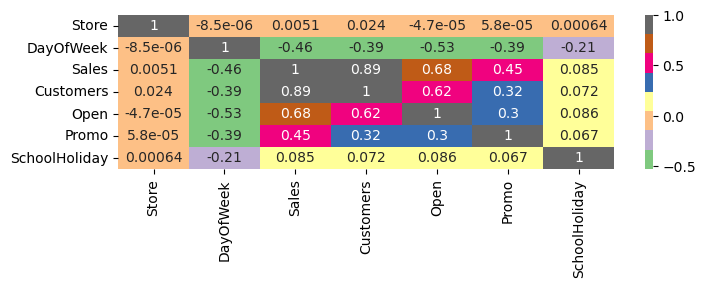

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(8,2))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Accent)
plt.show()
plt.savefig("main_correlation.png")

In [14]:
per= df_train[['Sales','Customers']].groupby(['Sales']).agg('median') #Sales 기준으로 sorting
print(per)

       Customers
Sales           
0            0.0
46           8.0
124         13.0
133         18.0
286         40.0
...          ...
38037     1970.0
38367     5192.0
38484     5458.0
38722     5132.0
41551     1721.0

[21734 rows x 1 columns]


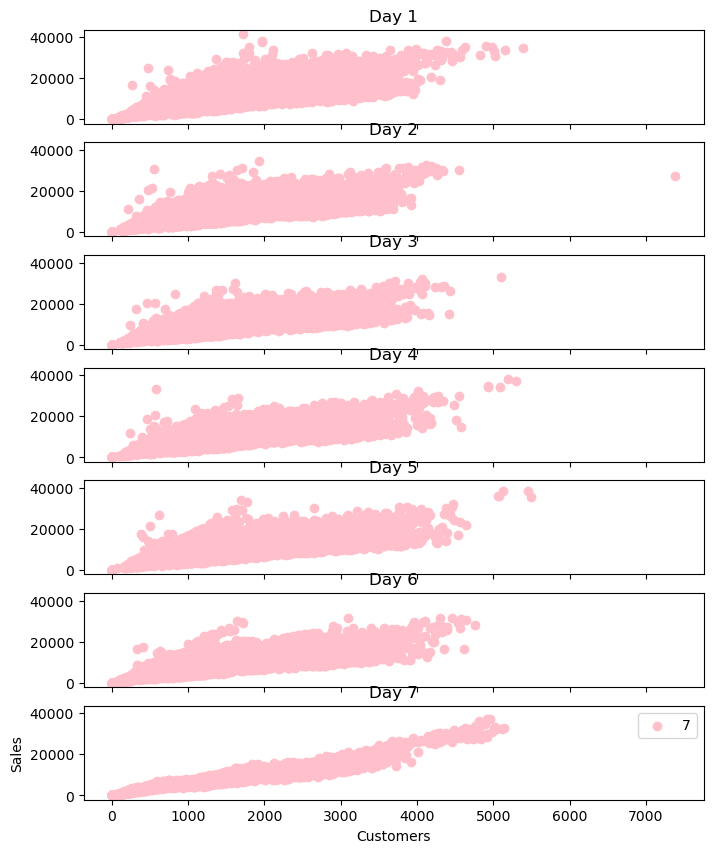

In [15]:
f, ax = plt.subplots(7, sharex=True, sharey=True, figsize=(8,10))
for i in range(1, 8):
    mask = df_train[df_train['DayOfWeek'] == i]
    ax[i - 1].set_title("Day {0}".format(i))
    ax[i - 1].scatter(mask['Customers'], mask['Sales'], label=i , color='pink')
plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

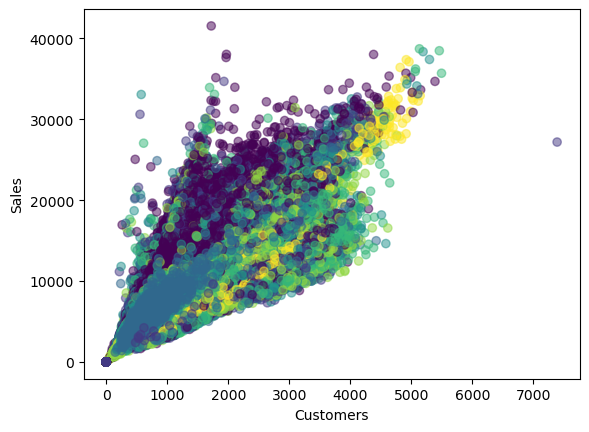

In [16]:
# 고객과 매출의 상관관계
plt.scatter(df_train['Customers'], df_train['Sales'], c=df_train['DayOfWeek'], alpha=0.5, cmap=plt.cm.get_cmap('viridis'))
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

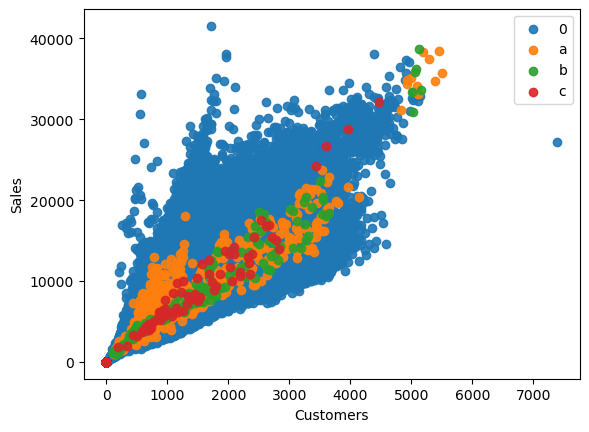

In [17]:
for i in ["0", "a", "b", "c"]:
    data = df_train[df_train['StateHoliday'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], alpha=0.9, label=i)
plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

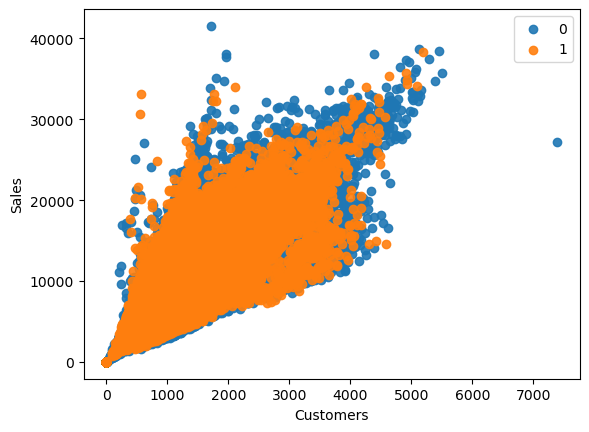

In [18]:
# 방학 기간이 영향을 미치는지 확인
for i in [0, 1]:
    data = df_train[df_train['SchoolHoliday'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], alpha=0.9, label=i)
plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

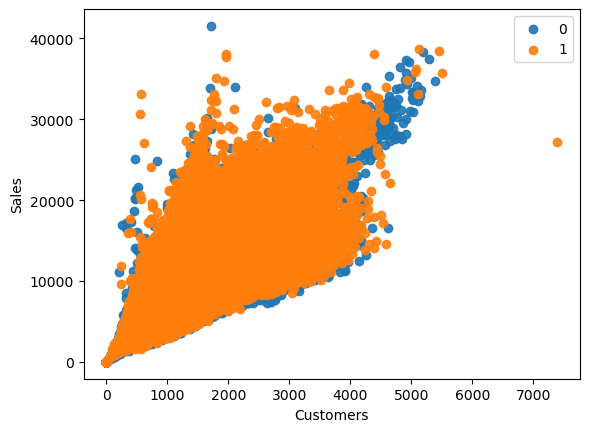

In [19]:
# 다양한 프로모션의 효과 확인하기
for i in [0, 1]:
    data = df_train[df_train['Promo'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], alpha=0.9, label=i)
plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

### <span style="color:#BF1E96">5. 매장별 통계 데이터 확인해보기
</span>

#### 5.1 spc = Sales/Customers로 새로운 열 생성 -> train.csv df

In [20]:
df_train['spc'] = df_train['Sales'] / df_train['Customers']

In [21]:
df_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'spc'],
      dtype='object')

In [22]:
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,spc
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118
...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,NaN
1017205,1112,2,2013-01-01,0,0,0,0,a,1,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,NaN


In [23]:
df_train.isnull()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,spc
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1017204,False,False,False,False,False,False,False,False,False,True
1017205,False,False,False,False,False,False,False,False,False,True
1017206,False,False,False,False,False,False,False,False,False,True
1017207,False,False,False,False,False,False,False,False,False,True


In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Store          1017209 non-null  int64  
 1   DayOfWeek      1017209 non-null  int64  
 2   Date           1017209 non-null  object 
 3   Sales          1017209 non-null  int64  
 4   Customers      1017209 non-null  int64  
 5   Open           1017209 non-null  int64  
 6   Promo          1017209 non-null  int64  
 7   StateHoliday   1017209 non-null  object 
 8   SchoolHoliday  1017209 non-null  int64  
 9   spc            844340 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 77.6+ MB


In [25]:
df_train['spc'].isnull().sum()

172869

In [26]:
df_train = df_train.fillna(0)

In [27]:
df_train['spc'].isnull().sum()

0

#### 5.2 Groupby 이용 store로 sales, customers, spc 평균값 만들어 보기 : store별 평균값 data(df_store에)

In [28]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [29]:
#groupby() : ()기준으로 sorting하겠다.

col_avg_sales = df_train.groupby(['Store']).agg({'Sales':'mean'})
col_avg_Customers = df_train.groupby(['Store']).agg({'Customers':'mean'})
col_avg_spc = df_train.groupby(['Store']).agg({'spc':'mean'})

In [30]:
col_avg_sales = col_avg_sales.reset_index()
col_avg_Customers = col_avg_Customers.reset_index()
col_avg_spc = col_avg_spc.reset_index()


print(col_avg_sales)
print(col_avg_Customers)
print(col_avg_spc)

      Store         Sales
0         1   3945.704883
1         2   4122.991507
2         3   5741.253715
3         4   8021.769639
4         5   3867.110403
...     ...           ...
1110   1111   4342.968153
1111   1112   8465.280255
1112   1113   5516.180467
1113   1114  17200.196391
1114   1115   5225.296178

[1115 rows x 2 columns]
      Store    Customers
0         1   467.646497
1         2   486.045648
2         3   620.286624
3         4  1100.057325
4         5   444.360934
...     ...          ...
1110   1111   373.548832
1111   1112   693.498938
1112   1113   596.763270
1113   1114  2664.057325
1114   1115   358.687898

[1115 rows x 2 columns]
      Store        spc
0         1   6.958559
1         2   6.998110
2         3   7.539925
3         4   6.033827
4         5   7.121176
...     ...        ...
1110   1111   9.549273
1111   1112   9.918483
1112   1113   7.666212
1113   1114   5.372308
1114   1115  11.952081

[1115 rows x 2 columns]


In [31]:
col_avg_sales = col_avg_sales.drop(['Store'], axis=1 )
col_avg_Customers = col_avg_Customers.drop(['Store'], axis=1 )
col_avg_spc = col_avg_spc.drop(['Store'], axis=1 )

print(col_avg_sales)
print(col_avg_Customers)
print(col_avg_spc)

             Sales
0      3945.704883
1      4122.991507
2      5741.253715
3      8021.769639
4      3867.110403
...            ...
1110   4342.968153
1111   8465.280255
1112   5516.180467
1113  17200.196391
1114   5225.296178

[1115 rows x 1 columns]
        Customers
0      467.646497
1      486.045648
2      620.286624
3     1100.057325
4      444.360934
...           ...
1110   373.548832
1111   693.498938
1112   596.763270
1113  2664.057325
1114   358.687898

[1115 rows x 1 columns]
            spc
0      6.958559
1      6.998110
2      7.539925
3      6.033827
4      7.121176
...         ...
1110   9.549273
1111   9.918483
1112   7.666212
1113   5.372308
1114  11.952081

[1115 rows x 1 columns]


### <span style="color:#BF1E96">6. store df에 5번에서 생성된 컬럼 merge 시키기 -> store df columns </span>

In [32]:
df_store['avg_sales'] = col_avg_sales
df_store['avg_customers'] = col_avg_Customers
df_store['avg_spc'] = col_avg_spc
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,avg_sales,avg_customers,avg_spc
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3945.704883,467.646497,6.958559
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",4122.991507,486.045648,6.998110
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",5741.253715,620.286624,7.539925
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,8021.769639,1100.057325,6.033827
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,3867.110403,444.360934,7.121176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",4342.968153,373.548832,9.549273
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0,8465.280255,693.498938,9.918483
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0,5516.180467,596.763270,7.666212
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0,17200.196391,2664.057325,5.372308


In [33]:
df_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'avg_sales',
       'avg_customers', 'avg_spc'],
      dtype='object')

In [34]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,avg_sales,avg_customers,avg_spc
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3945.704883,467.646497,6.958559
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",4122.991507,486.045648,6.998110
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",5741.253715,620.286624,7.539925
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,8021.769639,1100.057325,6.033827
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,3867.110403,444.360934,7.121176


### <span style="color:#BF1E96">7. Train df에 store df merge 시키기(기준은 Store 명 기준으로)</span>

In [35]:
merged_df_train = pd.merge(df_train, df_store, on='Store', how='left')

merged_df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,spc,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,avg_sales,avg_customers,avg_spc
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883,...,1270.0,9.0,2008.0,0,0.0,0.0,0,3945.704883,467.646497,6.958559
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",4122.991507,486.045648,6.998110
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",5741.253715,620.286624,7.539925
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457,...,620.0,9.0,2009.0,0,0.0,0.0,0,8021.769639,1100.057325,6.033827
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118,...,29910.0,4.0,2015.0,0,0.0,0.0,0,3867.110403,444.360934,7.121176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,0.000000,...,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",4342.968153,373.548832,9.549273
1017205,1112,2,2013-01-01,0,0,0,0,a,1,0.000000,...,1880.0,4.0,2006.0,0,0.0,0.0,0,8465.280255,693.498938,9.918483
1017206,1113,2,2013-01-01,0,0,0,0,a,1,0.000000,...,9260.0,0.0,0.0,0,0.0,0.0,0,5516.180467,596.763270,7.666212
1017207,1114,2,2013-01-01,0,0,0,0,a,1,0.000000,...,870.0,0.0,0.0,0,0.0,0.0,0,17200.196391,2664.057325,5.372308


### <span style="color:#BF1E96">8. Train df에서 Date를 Year, Month, Day, week로 변환하여 각각 컬럼을 생성</span>

In [36]:
merged_df_train['Date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1017209 entries, 0 to 1017208
Series name: Date
Non-Null Count    Dtype 
--------------    ----- 
1017209 non-null  object
dtypes: object(1)
memory usage: 15.5+ MB


In [37]:
merged_df_train['Date'] = pd.to_datetime(merged_df_train['Date'])

In [38]:
merged_df_train['Date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1017209 entries, 0 to 1017208
Series name: Date
Non-Null Count    Dtype         
--------------    -----         
1017209 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.5 MB


In [39]:
merged_df_train.insert(3,'Year', merged_df_train['Date'].dt.year)
merged_df_train.insert(4,'Month', merged_df_train['Date'].dt.month)
merged_df_train.insert(5,'Day', merged_df_train['Date'].dt.day)

In [40]:
merged_df_train

,Store,DayOfWeek,Date,Year,Month,Day,Sales,Customers,Open,Promo,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,avg_sales,avg_customers,avg_spc
0,1,5,2015-07-31,2015,7,31,5263,555,1,1,...,1270.0,9.0,2008.0,0,0.0,0.0,0,3945.704883,467.646497,6.958559
1,2,5,2015-07-31,2015,7,31,6064,625,1,1,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",4122.991507,486.045648,6.998110
2,3,5,2015-07-31,2015,7,31,8314,821,1,1,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",5741.253715,620.286624,7.539925
3,4,5,2015-07-31,2015,7,31,13995,1498,1,1,...,620.0,9.0,2009.0,0,0.0,0.0,0,8021.769639,1100.057325,6.033827
4,5,5,2015-07-31,2015,7,31,4822,559,1,1,...,29910.0,4.0,2015.0,0,0.0,0.0,0,3867.110403,444.360934,7.121176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,2013,1,1,0,0,0,0,...,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",4342.968153,373.548832,9.549273
1017205,1112,2,2013-01-01,2013,1,1,0,0,0,0,...,1880.0,4.0,2006.0,0,0.0,0.0,0,8465.280255,693.498938,9.918483
1017206,1113,2,2013-01-01,2013,1,1,0,0,0,0,...,9260.0,0.0,0.0,0,0.0,0.0,0,5516.180467,596.763270,7.666212
1017207,1114,2,2013-01-01,2013,1,1,0,0,0,0,...,870.0,0.0,0.0,0,0.0,0.0,0,17200.196391,2664.057325,5.372308


### <span style="color:#BF1E96">9. Train DF에서 Label, Features 컬럼 나누기(X, y)</span>

In [41]:
merged_df_train = merged_df_train.drop(['spc','Date','StateHoliday','StoreType','Assortment','PromoInterval'], axis=1)

In [42]:
non_opened = merged_df_train['Open'].isin([0])

merged_df_train = merged_df_train[~non_opened]

In [43]:
merged_df_train.columns

Index(['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'Sales', 'Customers',
       'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'avg_sales', 'avg_customers',
       'avg_spc'],
      dtype='object')

In [44]:
X = merged_df_train[['Store', 'DayOfWeek', 'Year', 'Month', 'Day',
       'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'avg_sales', 'avg_customers',
       'avg_spc']]
y = merged_df_train['Sales']

In [45]:
merged_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Year                       844392 non-null  int64  
 3   Month                      844392 non-null  int64  
 4   Day                        844392 non-null  int64  
 5   Sales                      844392 non-null  int64  
 6   Customers                  844392 non-null  int64  
 7   Open                       844392 non-null  int64  
 8   Promo                      844392 non-null  int64  
 9   SchoolHoliday              844392 non-null  int64  
 10  CompetitionDistance        844392 non-null  float64
 11  CompetitionOpenSinceMonth  844392 non-null  float64
 12  CompetitionOpenSinceYear   844392 non-null  float64
 13  Promo2                     8

### <span style="color:#BF1E96">10. X, y 데이터셋을 Train, test로 나누기(random state 넣지 말기)</span>

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print("X_train values count:", len(X_train))
print("X_test values count:", len(X_test))
print("y_train values count:", len(y_train))
print("y_test values count:", len(y_test))

X_train values count: 675513
X_test values count: 168879
y_train values count: 675513
y_test values count: 168879


### <span style="color:#BF1E96">11. 회귀(예측) AI 모델 선택하기: Linear regression, Ridge regression, Lasso regression, Polynomial regression 등</span>

In [47]:
model = LinearRegression()

### <span style="color:#BF1E96">12. Fit 학습, predict(예측), Score(성능 평가)</span>

- 학습

In [48]:
model.fit(X_train, y_train)

LinearRegression()

- 예측

In [49]:
y_pred = model.predict(X_test)
y_pred

array([ 4791.35016198,  4109.62128849,  5878.91044478, ...,
       14368.7625533 ,  6038.35155336,  4054.03062363])

In [50]:
#model.fit(X_train, y_train)
#y_train

error = 0
for i in range(len(y_pred)):
    if y_pred[i] < 0:
        error += 1
        
error   

0

- 성능 평가

In [51]:
def rmsle(y_test, y_pred):
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

# Create function to evaluate our model
def show_scores(y_test, val_pred):
    scores = {"Valid MAE": mean_absolute_error(y_test, val_pred),
              "Valid RMSLE": rmsle(y_test, val_pred)}
    return scores

In [52]:
# show_scores(MAE, RMSLE)
score = show_scores(y_test, y_pred)
score

{'Valid MAE': 1100.395531552105, 'Valid RMSLE': 0.22801269148910605}

### <span style="color:#BF1E96">13. test.csv 파일로 판매량 예측하기
</span>

- 데이터 확인 및 준비 - df_Test

In [53]:
df_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [54]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,avg_sales,avg_customers,avg_spc
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3945.704883,467.646497,6.958559
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",4122.991507,486.045648,6.998110
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",5741.253715,620.286624,7.539925
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,8021.769639,1100.057325,6.033827
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,3867.110403,444.360934,7.121176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",4342.968153,373.548832,9.549273
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0,8465.280255,693.498938,9.918483
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0,5516.180467,596.763270,7.666212
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0,17200.196391,2664.057325,5.372308


- df_Test와 df_Store 합치기

In [55]:
merged_df_test = pd.merge(df_test, df_store, on='Store', how='left')
merged_df_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,avg_sales,avg_customers,avg_spc
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3945.704883,467.646497,6.958559
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",5741.253715,620.286624,7.539925
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0,7356.902335,791.474522,7.703664
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0,4610.251592,547.799363,6.899802
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0,5426.816348,479.487261,9.267299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",4342.968153,373.548832,9.549273
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0,8465.280255,693.498938,9.918483
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,0.0,0.0,0,0.0,0.0,0,5516.180467,596.763270,7.666212
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,0.0,0.0,0,0.0,0.0,0,17200.196391,2664.057325,5.372308


- Date를 Year, Month, Day 로 변환 후 Date 삭제

In [56]:
merged_df_test['Date'] = pd.to_datetime(merged_df_test['Date'])


In [57]:
merged_df_test.insert(3,'Year', merged_df_test['Date'].dt.year)
merged_df_test.insert(4,'Month', merged_df_test['Date'].dt.month)
merged_df_test.insert(5,'Day', merged_df_test['Date'].dt.day)

In [58]:
merged_df_test

,Id,Store,DayOfWeek,Year,Month,Day,Date,Open,Promo,StateHoliday,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,avg_sales,avg_customers,avg_spc
0,1,1,4,2015,9,17,2015-09-17,1.0,1,0,...,1270.0,9.0,2008.0,0,0.0,0.0,0,3945.704883,467.646497,6.958559
1,2,3,4,2015,9,17,2015-09-17,1.0,1,0,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",5741.253715,620.286624,7.539925
2,3,7,4,2015,9,17,2015-09-17,1.0,1,0,...,24000.0,4.0,2013.0,0,0.0,0.0,0,7356.902335,791.474522,7.703664
3,4,8,4,2015,9,17,2015-09-17,1.0,1,0,...,7520.0,10.0,2014.0,0,0.0,0.0,0,4610.251592,547.799363,6.899802
4,5,9,4,2015,9,17,2015-09-17,1.0,1,0,...,2030.0,8.0,2000.0,0,0.0,0.0,0,5426.816348,479.487261,9.267299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015,8,1,2015-08-01,1.0,0,0,...,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",4342.968153,373.548832,9.549273
41084,41085,1112,6,2015,8,1,2015-08-01,1.0,0,0,...,1880.0,4.0,2006.0,0,0.0,0.0,0,8465.280255,693.498938,9.918483
41085,41086,1113,6,2015,8,1,2015-08-01,1.0,0,0,...,9260.0,0.0,0.0,0,0.0,0.0,0,5516.180467,596.763270,7.666212
41086,41087,1114,6,2015,8,1,2015-08-01,1.0,0,0,...,870.0,0.0,0.0,0,0.0,0.0,0,17200.196391,2664.057325,5.372308


- null값 채워넣기

In [59]:
#merged_df_test = merged_df_test.drop(['Date','StateHoliday','StoreType','Assortment','PromoInterval'], axis=1)

In [60]:
non_opened = merged_df_test['Open'].isin([0])

merged_df_test = merged_df_test[~non_opened]

In [61]:
merged_df_test.isnull().sum()
merged_df_test = merged_df_test.fillna(0)

In [62]:
merged_df_test.isnull().sum()

Id                           0
Store                        0
DayOfWeek                    0
Year                         0
Month                        0
Day                          0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
avg_sales                    0
avg_customers                0
avg_spc                      0
dtype: int64

In [63]:
merged_df_test

,Id,Store,DayOfWeek,Year,Month,Day,Date,Open,Promo,StateHoliday,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,avg_sales,avg_customers,avg_spc
0,1,1,4,2015,9,17,2015-09-17,1.0,1,0,...,1270.0,9.0,2008.0,0,0.0,0.0,0,3945.704883,467.646497,6.958559
1,2,3,4,2015,9,17,2015-09-17,1.0,1,0,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",5741.253715,620.286624,7.539925
2,3,7,4,2015,9,17,2015-09-17,1.0,1,0,...,24000.0,4.0,2013.0,0,0.0,0.0,0,7356.902335,791.474522,7.703664
3,4,8,4,2015,9,17,2015-09-17,1.0,1,0,...,7520.0,10.0,2014.0,0,0.0,0.0,0,4610.251592,547.799363,6.899802
4,5,9,4,2015,9,17,2015-09-17,1.0,1,0,...,2030.0,8.0,2000.0,0,0.0,0.0,0,5426.816348,479.487261,9.267299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015,8,1,2015-08-01,1.0,0,0,...,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",4342.968153,373.548832,9.549273
41084,41085,1112,6,2015,8,1,2015-08-01,1.0,0,0,...,1880.0,4.0,2006.0,0,0.0,0.0,0,8465.280255,693.498938,9.918483
41085,41086,1113,6,2015,8,1,2015-08-01,1.0,0,0,...,9260.0,0.0,0.0,0,0.0,0.0,0,5516.180467,596.763270,7.666212
41086,41087,1114,6,2015,8,1,2015-08-01,1.0,0,0,...,870.0,0.0,0.0,0,0.0,0.0,0,17200.196391,2664.057325,5.372308


In [64]:
merged_df_test = merged_df_test[['Store', 'DayOfWeek', 'Year', 'Month', 'Day',
       'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'avg_sales', 'avg_customers',
       'avg_spc']]

- 준비된 모델에 merged_df_Test 넣어 결과값 내기

In [65]:
y_pred_real = model.predict(merged_df_test)
y_pred_real

array([ 6377.90469444,  8500.07806682, 10364.99722491, ...,
        5749.72995167, 18555.64854269,  5328.07411861])

In [66]:
error = 0
for i in range(len(y_pred_real)):
    if y_pred_real[i] < 0:
        error += 1
error

0

- df_Test 파일에 예측 판매량 붙이기

In [67]:
merged_df_test['Sales forcast'] = y_pred_real
merged_df_test

C:\Users\User\AppData\Local\Temp\ipykernel_13400\3745068820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_test['Sales forcast'] = y_pred_real


,Store,DayOfWeek,Year,Month,Day,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,avg_sales,avg_customers,avg_spc,Sales forcast
0,1,4,2015,9,17,1,0,1270.0,9.0,2008.0,0,0.0,0.0,3945.704883,467.646497,6.958559,6377.904694
1,3,4,2015,9,17,1,0,14130.0,12.0,2006.0,1,14.0,2011.0,5741.253715,620.286624,7.539925,8500.078067
2,7,4,2015,9,17,1,0,24000.0,4.0,2013.0,0,0.0,0.0,7356.902335,791.474522,7.703664,10364.997225
3,8,4,2015,9,17,1,0,7520.0,10.0,2014.0,0,0.0,0.0,4610.251592,547.799363,6.899802,7137.173136
4,9,4,2015,9,17,1,0,2030.0,8.0,2000.0,0,0.0,0.0,5426.816348,479.487261,9.267299,8122.374457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,2015,8,1,0,0,1900.0,6.0,2014.0,1,31.0,2013.0,4342.968153,373.548832,9.549273,4358.383830
41084,1112,6,2015,8,1,0,0,1880.0,4.0,2006.0,0,0.0,0.0,8465.280255,693.498938,9.918483,9438.133549
41085,1113,6,2015,8,1,0,0,9260.0,0.0,0.0,0,0.0,0.0,5516.180467,596.763270,7.666212,5749.729952
41086,1114,6,2015,8,1,0,0,870.0,0.0,0.0,0,0.0,0.0,17200.196391,2664.057325,5.372308,18555.648543


- 예측 판매량 컬럼 담은 파일 내보내기

In [68]:
merged_df_test.to_csv(r'./Submission_dd.csv',index=False)